# Sample Analysis of Female Engineer Ratio in Companies

## Jihyun Kim

For this analysis of the percentage of female engineers in a company, I am using Python and pandas library to do simple cleaning, extraction, and visualization of the data.

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Reading in the data as csv that I imported under a simpler name.

In [113]:
df = pd.read_csv('techinternquiz.csv')

Now I am setting the index of the dataframe to be the company name, and only saving the second to sixth columns.

In [114]:
df = df.set_index('company')
df = df[[1,2,3,4,5]]

Displaying the first five entries will show us the following data:

In [131]:
df.head()

,num_female_eng,num_eng,percent_female_eng,Location,Industry
company,,,,,
10up,8,67,11.94,London,FinTech
1up talent,0,2,0.00,London,HealthTech
7digital,1,21,4.76,New York City,E-commerce
Activision,1,30,3.33,San Diego,Electronics and components
Addepar,1,29,3.45,San Diego,FinTech


From a simple description of the data below, we know that the average of percentage of female engineers in 261 companies is only 20.14%! 

In [116]:
df.shape

(261, 5)

In [117]:
df['percent_female_eng'].mean()

20.14264367816093

## Fintech Companies in London with less than 15% female engineers

To filter fintech companies in London with less than 15% female engieers, I ran a simple one liner code that selects only the rows that match three of the conditionals we specified.

But first, we are doing some simple cleaning to make sure there are no conflicting spellings in the city and industry names.

In [125]:
df['Location'].replace(to_replace='San diego', value='San Diego', inplace=True)
df['Location'].replace(to_replace='HongKong', value='Hong Kong', inplace=True)
df['Location'].replace(to_replace='Hong kong', value='Hong Kong', inplace=True)
df['Location'].replace(to_replace='NYC', value='New York City', inplace=True)
df['Location'].replace(to_replace='SF', value='San Francisco', inplace=True)

df['Industry'].replace(to_replace='Healthtech', value='HealthTech', inplace=True)
df['Industry'].replace(to_replace='Fintech', value='FinTech', inplace=True)

In [127]:
ldn_fin = df.ix[(df['percent_female_eng'] < 15) & (df['Location'] == 'London') & (df['Industry'] == 'FinTech')]

In [128]:
ldn_fin

,num_female_eng,num_eng,percent_female_eng,Location,Industry
company,,,,,
10up,8,67,11.94,London,FinTech
Elemental Technologies,6,55,10.91,London,FinTech
GitHub,14,104,13.46,London,FinTech
PolicyStat,0,3,0.00,London,FinTech
Zerocater,0,2,0.00,London,FinTech


Running this code has generated 5 companies that fit our critieria. These are
- 10up
- Elemental Technologies
- GitHub
- PolicyStat
- Zerocrater

## Some extra fun

Although this data is not entirely factual, it still provides interesting insight about the general percentage of women employed by companies of various size and industry.

In [135]:
location = df.groupby('Location')
loc_avg = location['percent_female_eng'].agg([np.mean, np.std]).sort_values(['mean'])

In [136]:
loc_avg

,mean,std
Location,,
San Diego,17.396304,18.747986
Paris,18.575769,11.749113
Berlin,18.819333,13.636248
London,19.800000,14.112449
Toronto,20.809231,13.250186
San Francisco,21.311739,20.410980
New York City,21.379348,21.254542
Hong Kong,23.723704,21.560927


In [137]:
location = df.groupby('Location')
loc_avg = location['percent_female_eng'].agg([np.mean]).sort_values(['mean'])
industry = df.groupby('Industry')
ind_avg = industry['percent_female_eng'].agg([np.mean]).sort_values(['mean'])

In [139]:
loc_avg

,mean
Location,
San Diego,17.396304
Paris,18.575769
Berlin,18.819333
London,19.800000
Toronto,20.809231
San Francisco,21.311739
New York City,21.379348
Hong Kong,23.723704


In [140]:
ind_avg

,mean
Industry,
E-commerce,13.724000
Electronics and components,14.418333
HealthTech,15.373793
MusicTech,16.338333
Information Security,18.276667
Property,18.938571
Marketplace and lead generation,19.860625
FinTech,19.972361
Media and entertainment,23.146250


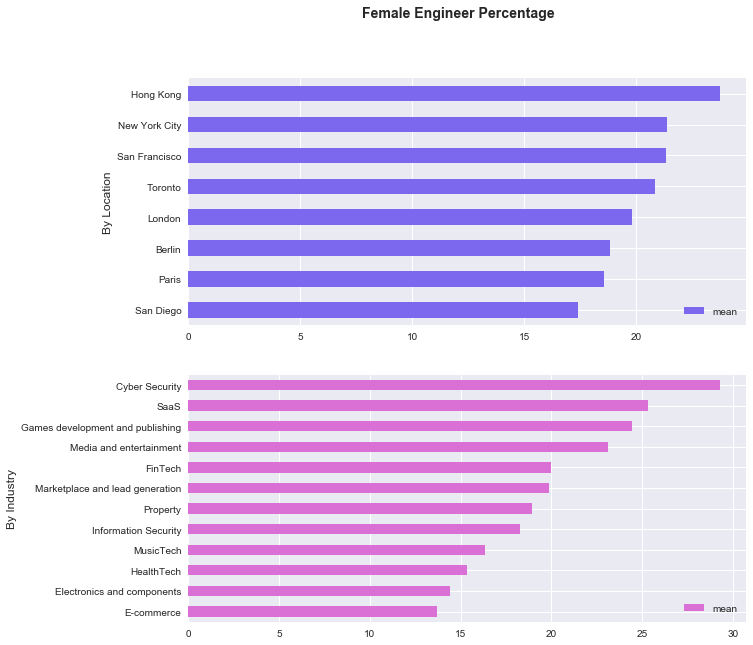

In [143]:
fig, ax = plt.subplots(figsize=(10,10), nrows=2, ncols=1)
fig.suptitle('Female Engineer Percentage', fontsize=14, fontweight='bold')
loc_avg.plot(kind='barh', ax=ax[0], color='mediumslateblue')
ind_avg.plot(kind='barh', ax=ax[1], color = 'orchid')

ax[0].set_ylabel('By Location', fontsize=12)
ax[1].set_ylabel('By Industry', fontsize=12)

The bar graphs above provide a straightforward insight into how the percentage varies by industry and location.

For a better idea of how individual companies are doing, I sorted the data by percentage of female engineers and displayed the highest 20 and lowest 20.

In [159]:
high_fem = df.sort_values(by=['percent_female_eng'],ascending=False)

## 20 companies with highest percentage of female engineers

In [161]:
high_fem.head(20)

,num_female_eng,num_eng,percent_female_eng,Location,Industry
company,,,,,
Kabinet,2,2,100.00,New York City,FinTech
Tog+Porter,1,1,100.00,New York City,SaaS
Spitfire Athlete,2,2,100.00,Hong Kong,Cyber Security
HIPAA Risk Management,2,2,100.00,San Francisco,Cyber Security
Northwest Independent Ruby Development,7,8,87.50,San Diego,FinTech
The Muse,3,4,75.00,San Diego,Marketplace and lead generation
Getable,2,3,66.67,Hong Kong,Games development and publishing
Yellowsmith,2,3,66.67,San Francisco,FinTech
Wizard Development,2,3,66.67,San Diego,Cyber Security


## 20 companies with lowest percentage of female engineers

In [162]:
high_fem.tail(20)

,num_female_eng,num_eng,percent_female_eng,Location,Industry
company,,,,,
Qstream,0,3,0.0,San Francisco,Property
PolicyStat,0,3,0.0,London,FinTech
Nextdoor,0,29,0.0,Hong Kong,Property
Moontoast,0,14,0.0,San Francisco,SaaS
1up talent,0,2,0.0,London,HealthTech
Shift,0,27,0.0,San Diego,FinTech
Massdrop,0,8,0.0,San Francisco,Information Security
Sifteo,0,4,0.0,San Diego,FinTech
"Kaon Interactive, Inc.",0,5,0.0,San Diego,Games development and publishing


## None or less than 10% female engineers?!

Some companies do especially terribly with hiring female engineers even when the number of engineers is 10! To have an idea of which companies do not do well, I extracted all companies that have more than 10 engineers, none of which is female.

In [163]:
wow = df.ix[(df['percent_female_eng'] == 0.0) & (df['num_eng'] > 10)]

In [164]:
wow

,num_female_eng,num_eng,percent_female_eng,Location,Industry
company,,,,,
Collective IDea,0,14,0.0,San Francisco,FinTech
Fog Creek Software,0,20,0.0,New York City,Electronics and components
Guidebook,0,22,0.0,San Diego,Electronics and components
Harvest,0,15,0.0,New York City,FinTech
Moontoast,0,14,0.0,San Francisco,SaaS
Nextdoor,0,29,0.0,Hong Kong,Property
Shift,0,27,0.0,San Diego,FinTech
StackMob,0,14,0.0,London,Marketplace and lead generation


In [165]:
wow2 = df.ix[(df['percent_female_eng'] < 10) & (df['num_eng'] > 10)]

In [166]:
wow2

,num_female_eng,num_eng,percent_female_eng,Location,Industry
company,,,,,
7digital,1,21,4.76,New York City,E-commerce
Activision,1,30,3.33,San Diego,Electronics and components
Addepar,1,29,3.45,San Diego,FinTech
Automattic,14,198,7.07,Berlin,FinTech
Basecamp,1,20,5.00,New York City,Information Security
Birchbox,2,28,7.14,New York City,FinTech
Birst,1,19,5.26,Toronto,Marketplace and lead generation
Capsher Technology,4,55,7.27,Berlin,SaaS
Cognitect,2,25,8.00,New York City,FinTech


## Correlation between number of engineers and percentage of female engineer

The graph below shows a very interesting negative nonlinear correlation between number of engineers and percentage of female engineers. The plot below excludes a few large companies of more than 300 employees for better representation without outliers.

This plot actually shows that there is not a single company with equal number of female and male engineers once the total number of engineers exceed about 10. __Once engineer size grows beyond 100, the maximum possible ratio of female engineers is limited to 20%.__

(0, 300)

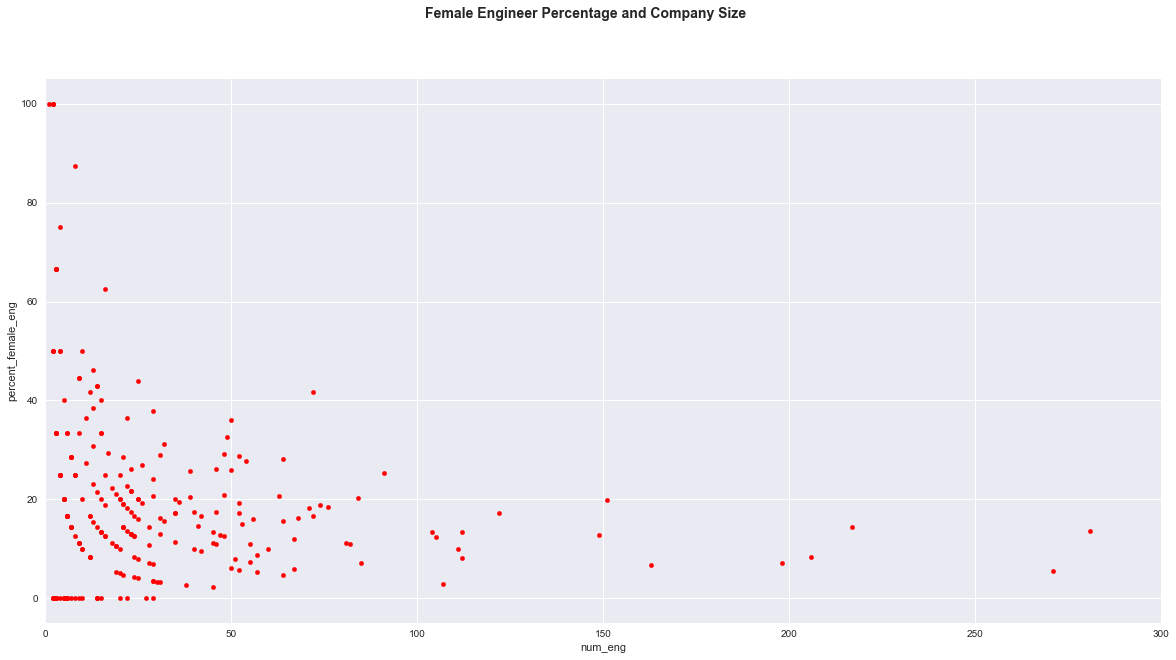

In [174]:
fig, ax = plt.subplots(figsize=(20,10))
fig.suptitle('Female Engineer Percentage and Company Size', fontsize=14, fontweight='bold')
df.plot(kind='scatter', x='num_eng', y='percent_female_eng', ax=ax, color='red')
plt.xlim(0,300)

## Conclusion

These companies are those with more than 10 employees, less than 10% of which are female. Compared to the 8 companies above that had NO female engineers, these have done a little bit better. However, for companies like Qualcomm, Yelp, Automattic that have more than 100 employees, it is easy to imagine the importance of bringing in more female engineers for more diversity in workplace, product design, and business strategy.

I would love to focus on analyzing and scraping more data related to this field so that companies can have more objective understanding about their industry and location standards and why having more female engineers can benefit their businesses in long run.
